In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import sys
import os
sys.path.append('../../../scripts/')
import data_cleaning

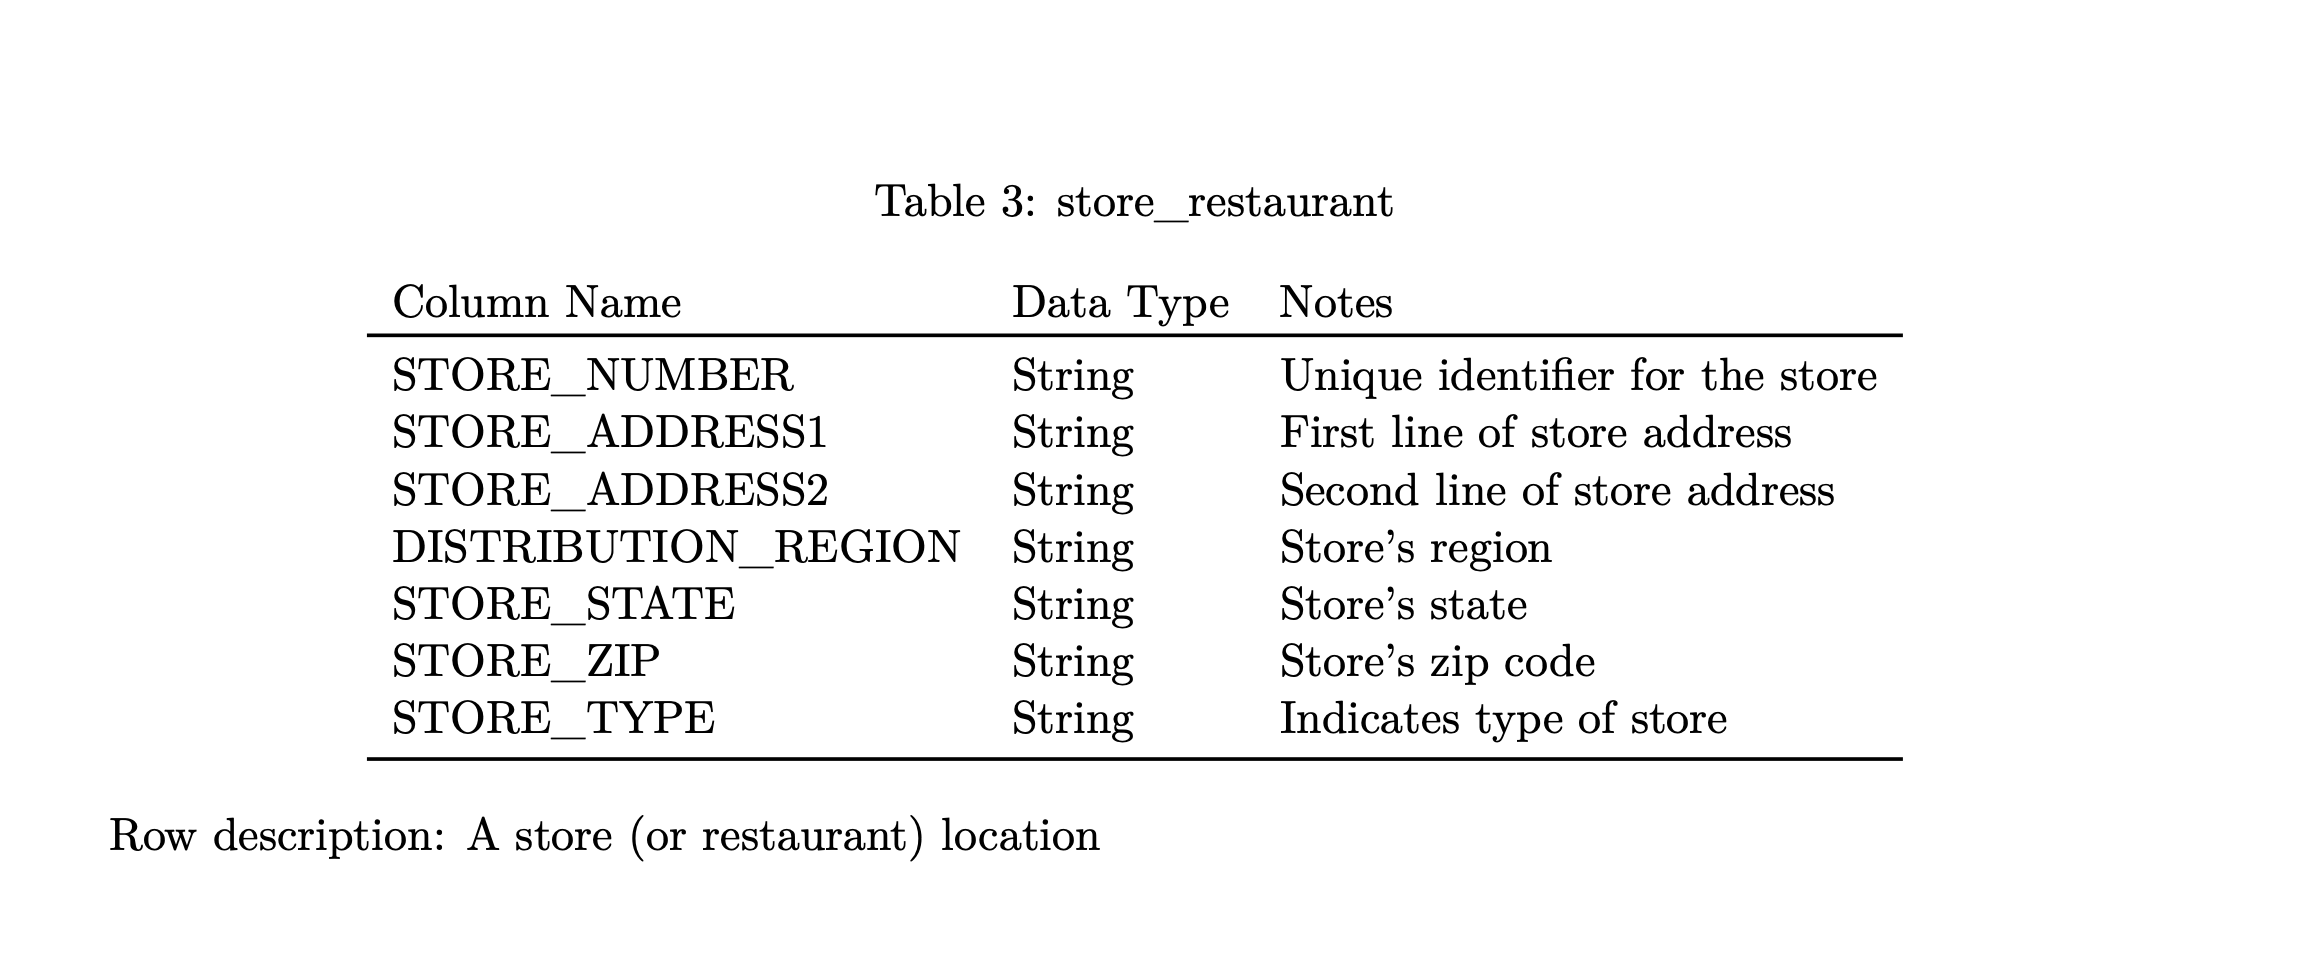

In [14]:
df = pd.read_csv('../../../data/raw/store_restaurant.csv')

In [15]:
df.head()

,STORE_ADDRESS1,STORE_ADDRESS2,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,STORE_LOYALTY_FLAG,STORE_NUMBER
0,Ninth Street,,Western,California,Berkeley,94710,Traditional,N,46673
1,Shattuck Sq,Shop #6,Western,California,Berkeley,94704,Traditional,Y,4904
2,Myrtle Avenue,,Northeast,New York,Ridgewood,11385,Traditional,Y,12631
3,Whitney Avenue,,Northeast,New York,Elmhurst,11373,Traditional,Y,20974


# 1. Kiểm tra kiểu dữ liệu

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STORE_ADDRESS1       4 non-null      object
 1   STORE_ADDRESS2       4 non-null      object
 2   DISTRIBUTION_REGION  4 non-null      object
 3   STORE_STATE          4 non-null      object
 4   STORE_CITY           4 non-null      object
 5   STORE_ZIP            4 non-null      int64 
 6   STORE_TYPE           4 non-null      object
 7   STORE_LOYALTY_FLAG   4 non-null      object
 8   STORE_NUMBER         4 non-null      int64 
dtypes: int64(2), object(7)
memory usage: 416.0+ bytes


# 2. Kiểm tra xử lý khoảng trắng

## 2.1 Kiểm tra

In [17]:
df.select_dtypes(include="object").columns

Index(['STORE_ADDRESS1', 'STORE_ADDRESS2', 'DISTRIBUTION_REGION',
       'STORE_STATE', 'STORE_CITY', 'STORE_TYPE', 'STORE_LOYALTY_FLAG'],
      dtype='object')

In [18]:
df['STORE_ADDRESS1'].unique()

array(['Ninth Street                                ',
       'Shattuck Sq                                   ',
       'Myrtle Avenue                              ', 'Whitney Avenue'],
      dtype=object)

## 2.2 Xử lý

In [19]:
df = data_cleaning.remove_whitespace(df)

In [20]:
df['STORE_ADDRESS1'].unique()

array(['Ninth Street', 'Shattuck Sq', 'Myrtle Avenue', 'Whitney Avenue'],
      dtype=object)

# 3. Kiểm tra giá trị thiếu

## 3.1 Kiểm tra

In [21]:
df.isna().sum()

STORE_ADDRESS1         0
STORE_ADDRESS2         0
DISTRIBUTION_REGION    0
STORE_STATE            0
STORE_CITY             0
STORE_ZIP              0
STORE_TYPE             0
STORE_LOYALTY_FLAG     0
STORE_NUMBER           0
dtype: int64

# 4. Kiểm tra trùng lặp

## 4.1 Kiểm tra

In [22]:
df.duplicated().sum()

0

# 5. Xoá cột STORE_ADDRESS2

In [23]:
df.drop(columns="STORE_ADDRESS2", inplace=True)
df

,STORE_ADDRESS1,DISTRIBUTION_REGION,STORE_STATE,STORE_CITY,STORE_ZIP,STORE_TYPE,STORE_LOYALTY_FLAG,STORE_NUMBER
0,Ninth Street,Western,California,Berkeley,94710,Traditional,N,46673
1,Shattuck Sq,Western,California,Berkeley,94704,Traditional,Y,4904
2,Myrtle Avenue,Northeast,New York,Ridgewood,11385,Traditional,Y,12631
3,Whitney Avenue,Northeast,New York,Elmhurst,11373,Traditional,Y,20974


# 6. Lưu trữ dữ liệu

In [25]:
# current_date = datetime.now().strftime("%Y%m%d")
# parent_dir = "../../../data/processed" 

# # Tạo đường dẫn đầy đủ cho thư mục mới
# new_folder_path = os.path.join(parent_dir, current_date)

# # Kiểm tra xem thư mục đã tồn tại chưa, nếu chưa thì tạo mới
# if not os.path.exists(new_folder_path):
#     os.makedirs(new_folder_path)
#     print(f"Thư mục '{new_folder_path}' đã được tạo thành công!")
# else:
#     print(f"Thư mục '{new_folder_path}' đã tồn tại.")

# df.to_csv(f'{new_folder_path}/3.store_restaurant_{current_date}.csv', index=False)

Thư mục '../../../data/processed/20240722' đã tồn tại.
